# **Tarea 1 - EYP3407**
### Profesor: Mauricio Castro
#### *Por: Javiera Valenzuela Soto y Francisca Vilca Sánchez*

In [2]:
# Librerías a usar

#%pip install scipy

import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Entropía
Sea $Z$ una variable aleatoria con función de densidad dada por

$$f(z |\mu ,\sigma^2,\alpha) = \frac{2}{\sigma}\phi(\frac{z − \mu}{\sigma})\Phi(\alpha(\frac{z − \mu}{\sigma})),z \in \mathbb{R},$$

donde $\phi(·)$ y $\Phi(·)$ representan la función de densidad y la función distribución, respectivamente, de una variable aleatoria normal estándar. La notación utilizada para referirnos a la distribución de $Z$ seŕa $Z ∼ SN(\mu,\sigma^2,\alpha)$. Note que cuando $\alpha = 0, Z ∼ N(\mu,\sigma^2)$. Muestre
que la entropía $H_{SN}(\mu,\sigma^2,\alpha)$ de $Z$, está dada por 

$$H_{SN}(\mu,\sigma^2,\alpha) = H_{N}(\mu,\sigma^2) − E_{X_0} [ln (2\Phi(\alpha X_0))] ,$$

donde $X_0 ∼ SN(\alpha)$ y $H_{N(\mu,\sigma^2)}$ es la entropía cuando $Z ∼ N(\mu,\sigma^2)$. Grafique la entropía $H_{SN}(\mu=0,\sigma^2=1,\alpha)$ para diferentes una grilla de valores de α entre $−20$ y $20$. ¿Qué puede concluir de lo anterior?

## Solución:

Para comprobar que la Entropía de una Skew-normal (SN) se puede reescribir en términos de la Entropía de una Normal más la Esperanza de una variable aleatoria SN con $\mu = 0 $ y $ \sigma^2 = 1$, nos guiaremos del árticulo "*Shannon Entropy and mutual information for multivariate Skew-Elliptical distributions*". Usando el Lema 1, de dicho artículo es posible comprobar que la Entropía de una va $Z ~ N(\mu,\sigma^2) $ se puede reescribir como:

\begin{align*}
H(Z) &= -E(log(f(Z))) \\
&= -E(log ( \frac{1}{\sqrt{2\pi\sigma^2}} exp\{ \frac{1}{2}(\frac{x-\mu}{\sigma^2})^2 \} ) ) \\
&= -E(log(\sigma^{-1})) - E( (log(f(Z_0))) ) \\
&= log(\sigma) - H(Z_0)
\end{align*}

Donde $Z_0 \sim N(0,1)$, con este Lema y basandonos que la Skew-Normal es una variación de la Normal, además de usar la definición de Entropía se puede obtener:

\begin{align*}
H(Z) &= -E(log(f(Z))) \\
&= log(\sigma) - H(X_0) \\
&= log(\sigma) - E(log(2\phi(X_0)\Phi(\alpha X_0)))\\
&= log(\sigma) - E(log(\phi(X_0))) - E(log(2\Phi(\alpha X_0)))\\
&= H(Z) - E( log(2 \Phi (\alpha X_0)) )
\end{align*}

Con el procedimiento anterior, se muestra el resultado pedido, ahora para revisar que ocurre con la Entropía de una Skew-Normal se usará la librería `spicy.stats` para calcular la Entropía de las diferentes distribuciones tal como se muestra a continuación en el siguiente código:

In [3]:
# Definimos los parámetros de la distribución skew-normal como mu = 0 y sigma2 = 1
# Pero para alpha sera un vector con distintos valores

alpha = np.linspace(-20,20,1000) # Parámetro de sesgo
media = 0  # Media
sigma2 = 1  # Desviación estándar

entropy_SKN = list() # guardar el valor de la entropía para cada valor alpha[i] de la skew-normal
entropy_N = list() # guardar el valor de la entropía de una normal

# Crearemos 1000 distribuciones skew-normal y se guardará el valor en las listas anteriores

for i in range(len(alpha)):
    skew_normal_dist = stats.skewnorm(alpha[i],loc= media,scale= sigma2)
    normal_dist = stats.norm(0, 1)
    entropy_N.append(normal_dist.entropy())
    entropy_SKN.append(skew_normal_dist.entropy())


Una vez que están calculadas las entropias para ambas distribuciones, ya se puede hacer el gráfico para ver como varía esta: 

In [4]:
# Creación de un data frame para ver la Entropía
data = {"alphas": alpha,"entropia_SKN": entropy_SKN,"entropia_N": entropy_N}

df = pd.DataFrame(data)

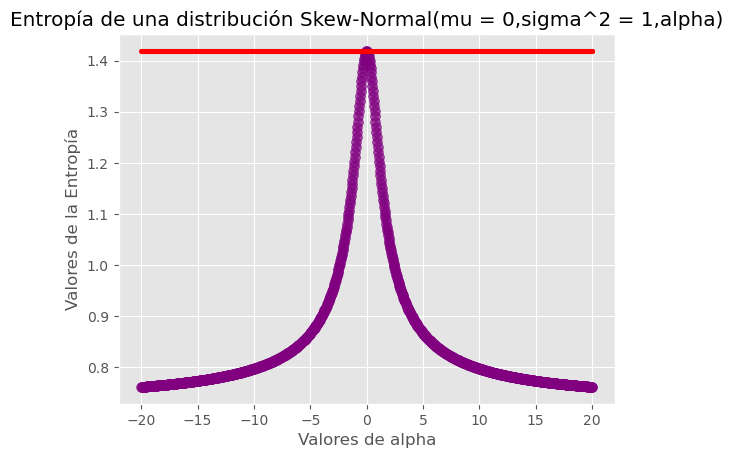

In [5]:
# Creación del gráfico
plt.style.use("ggplot")
df.plot(x = "alphas", y = "entropia_SKN", kind="scatter",color="purple",s=50, alpha = 0.7)
plt.xlabel("Valores de alpha")
plt.ylabel("Valores de la Entropía")
plt.title("Entropía de una distribución Skew-Normal(mu = 0,sigma^2 = 1,alpha)")
plt.scatter(alpha,entropy_N, label='Nuevos', color='red',s=10, alpha = 0.9)


El parámetro de sesgo $\alpha$ de una distribución Skew-Normal controla la asimetría de la distribución. Al cambiar el valor de $\alpha$ tendrá un efecto en la forma de la distribución Skew-Normal, y por consiguiente, afectará la entropía de la distribución.

En este caso, lo que se hizó fue generar 1000 puntos en el intervalo -20 y 20, es bastante claro notar que a medida que se acerca a 0 tanto por la derecha o la izquierda la entropía se asemeja a la entropía de una Normal Estándar que se puede observar de color rojo en el gráfico anterior.

Ahora bien, el tener un valor $|\alpha|> 5$ aproximadamente, es bastante útil, ya que la entropía es bastante baja por lo que hay mayor información de los eventos, disminuyendo de la misma manera la incertidumbre.

## 2) Realización de "Sistemas de Recomendación"

Para comenzar, se planteó el desafío de implementar al menos dos métodos de recomendación sobre un conjunto de datos a partir de  un [repositorio en GitHub](https://github.com/caserec/Datasets-for-Recommender-Systems) creado por Arthur F. da Costa Ph.D. del Instituto de Matemática y Ciencias de la Computación de la Universidad de Sao Paulo.
Para la realización de los sistemas de recomendación, el proyecto se enfocó en las bases de datos llamadas *anime.csv* y *ratings.csv* del dataset "Anime Recommendatios Database" debido a la amplia gama de opciones que poseen los programas televisivos y/o películas de animación japonesa, o mejor conocido como anime.

### (a) Descripción y objetivo del problema

La dataset contiene información sobre las preferencias de 73516 usuarios y sus respectivas calificaciones hacia 12294 animes en dos archivos *.csv*. El archivo llamado "*anime.csv*" contiene la información de diversas animaciones japonesas y sus respectivos géneros, rating y cantidad de miembros que lo sintonizaron. Mientras que en el archivo llamado"*rating.csv*", posee la información de los ratings que cada usuario otorgó, de manera anónima cabe destacar, a cada anime. Estos últimos se muestran en el archivo bajo un id único.

Debido a la diversa cantidad de opciones de animes disponibles, escoger uno que logre ser del interés del individuo puede representar un desafío. Por lo tanto, luego del análisis de la data, se planteó el objetivo de proporcionar posibles recomendaciones de animes basadas en la similitud de las calificaciones entregadas por cada usuario a cada programa japonés visto en común. Así, debido a que poseerán un criterio de calificación en común, se obtendrá como resultado una recomendación de anime que podría ser del interés del usuario.
Lo anteriormente mencionado será puesto en práctica en este proyecto mediante técnicas de análisis de datos y aprendizajes automáticos otorgados por los sistemas de recomendación con el fin de predecir las calificaciones entregadas por cada individuo a cada anime presente en la dataset para obtener los resultados anteriormente propuestos.

### (b) Análisis exploratorio de los datos

Para comenzar, se realizó una limpieza inicial en los datos para crear el sistema de recomendación. Tal como se mencionó, tenemos dos dataset llamados *"animes.csv"* y *"rating.csv"* de con 12294 y 7813737 datos, respectivamente.

In [3]:
# Carga de la base "anime.csv"
data = pd.read_csv("anime.csv")
display(data.head())
print("Dimensiones:", data.shape)

#Carga de la base "rating.csv"
ratings = pd.read_csv("rating.csv")
display(ratings.head())
print("Dimensiones:", ratings.shape)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Dimensiones: (12294, 7)


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Dimensiones: (7813737, 3)


Procedemos a separar la columna llamada `genre` por comas, para así tener la caracterización completa de cada anime en diversas columnas. Esto podría generar valores NA, pero esa problemática será tratada más adelante en el proyecto.

In [4]:
genre= data["genre"].str.split(',', expand=True)
data = pd.concat([data, genre], axis=1)
data.rename(columns={0:'genero_1', 1:'genero_2', 2:'genero_3', 3:'genero_4', 
4:'genero_5', 5:'genero_6',6:'genero_7',7:'genero_8',8:'genero_9',9:'genero_10',
10:'genero_11',11:'genero_12',12:'genero_13'}, inplace=True)
data.drop(['genre'], axis=1, inplace=True)

Debido a que existe una gran diversidad de "tipos", "rating" y "géneros" de anime en la dataset, se procedió a realizar, como análisis exploratorio, diversos gráficos que nos permitiera tener una apreciación de la información más amigable. Se comenzó analizando la variable `type`.

,Cantidad
type,
Movie,2348
Music,488
ONA,659
OVA,3311
Special,1676
TV,3787


Text(0.5, 1.0, 'Televidentes según tipo de Anime')

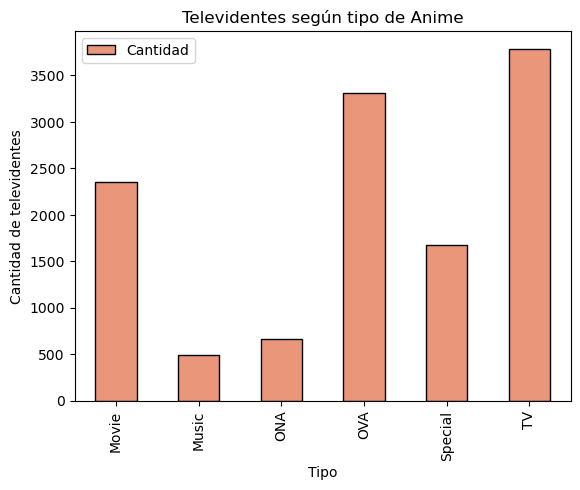

In [5]:
# Realizamos un conteo de cada tipo de anime
data_barplot = data.groupby(["type"]).agg({"type": "count"})
data_barplot.rename(columns={"type": "Cantidad"}, inplace=True)
tabla = data_barplot.rename(index={1: "Fila_1"})
display(tabla)

# Se realiza un gráfico de barras
data_barplot.plot(kind="bar", color="#E9967A", edgecolor='black')
plt.xlabel('Tipo')
plt.ylabel('Cantidad de televidentes')
plt.title('Televidentes según tipo de Anime')

Se logra apreciar en la gráfica, que los tipos de anime más visualizados son los que poseen la etiqueta de "TV", "Special", "Movie" y "OVA". Una vez ya visualizada los tipos de anime preferidos por la audiencia, se procedió a graficar los rating obtenidos según tipo en la data set. 

(5.5, 7.0)

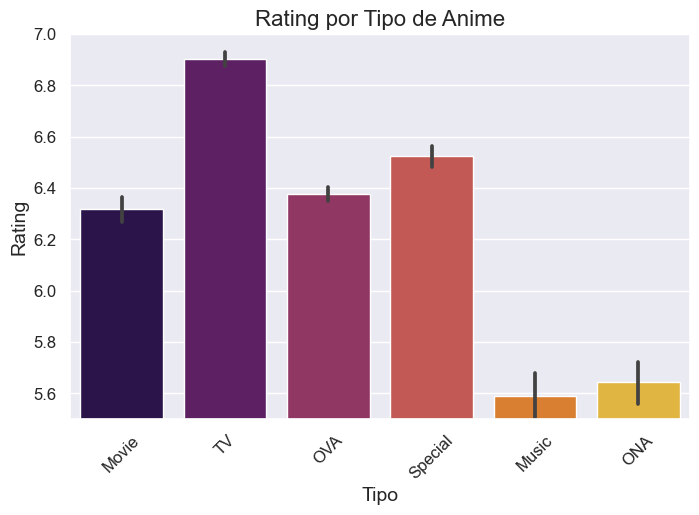

In [6]:
plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")
sns.barplot(x="type", y="rating", data=data, palette="inferno")

# Personalizar el gráfico
plt.title('Rating por Tipo de Anime', fontsize=16)
plt.xlabel('Tipo', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12, rotation= 45)
plt.yticks(fontsize=12)
plt.ylim(5.5, 7)

Podemos visualizar que, nuevamente, los tipos de anime que presentan las etiquetas de "Movie", "TV", "OVA" y "Special" son las que presentan un mayor ranking. Sin embargo, a pesar que el tipo "Movie" era parte de los 4 tipos que presentaban una mayor cantidad de calificaciones por usuario, es la que presenta un menor ranking entre ellas. Lo anterior suponemos que puede deberse a que, usualmente, las películas no suelen tener una relación con los programas japoneses de TV, ocasionando así que el impacto y audiencia, probablemente, sea menor teniendo así sentido los resultados obtenidos.
Debido a ese motivo, se decidió utilizar solamente los tipos de anime que fueran "Movies", "TV" y "OVA" para realizar el sistema de recomendación. Si volvemos a graficarlos, podemos notar que ahora los ratings suelen ser mucho más parecidos entre sí.

(5.5, 7.0)

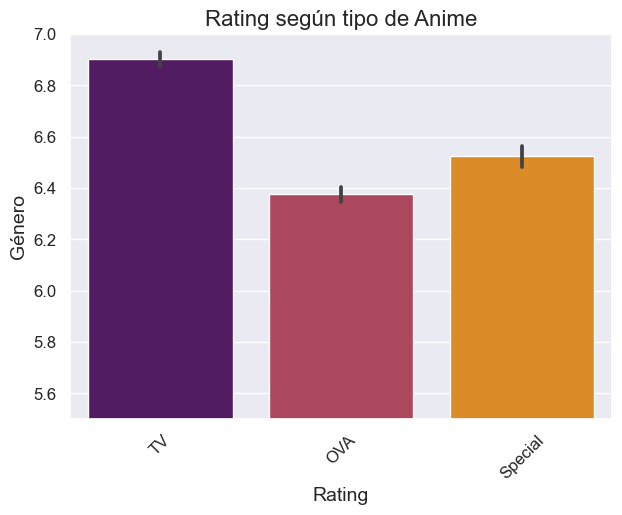

In [7]:
#Procedemos a filtrar la data
data.query('type == "TV" or type == "OVA" or type== "Special"', inplace=True)

#Realizamos el gráfico nuevamente
plt.figure(figsize=(7, 5))
sns.set(style="darkgrid")
sns.barplot(x="type", y="rating", data=data, palette="inferno")

# Personalizar el gráfico
plt.title('Rating según tipo de Anime', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.xticks(fontsize=12, rotation= 45)
plt.yticks(fontsize=12)
plt.ylim(5.5, 7)

Para continuar con el análisis de datos, y como nos centraremos en la columna `rating` para realizar el sistema de recomendación, se realizó un visualización de los datos obtenidos en esa columna mediante un gráfico de barras.

rating
False    8627
True      147
Name: count, dtype: int64

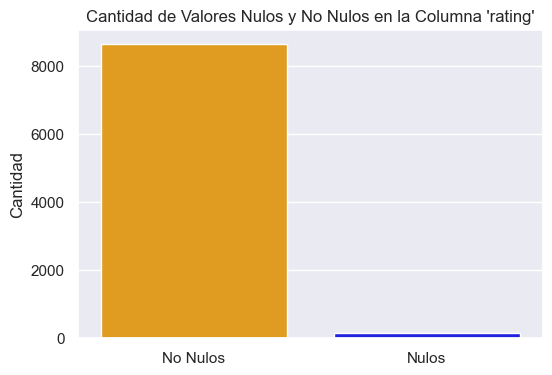

In [8]:
# Contar valores nulos y no nulos en la columna "rating"
rating_contador = data["rating"].isnull().value_counts()
display(rating_contador)

# Graficamos
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=rating_contador.index, y=rating_contador.values, palette=["orange", "blue"])
plt.title("Cantidad de Valores Nulos y No Nulos en la Columna 'rating'")
plt.xlabel("")
plt.ylabel("Cantidad")
plt.xticks([0, 1], ["No Nulos", "Nulos"])
plt.show()


Podemos notar que existen 147 valores nulos en la columna `rating` de nuestra dataset, los cuales se procedieron a eliminar de la base. La principal razón de hacer este procedimiento se debe a que, para generar el sistema de recomendación, se utilizarán a los usuarios que hayan entregado una calificación al anime y compararlas con el resto de las calificaciones de otros individuos. Así, podremos obtener los más parecidos entre sí. Por lo tanto, era necesario eliminar esos valores faltantes de ambas bases.
Cabe destacar, que los valores faltantes en la dataset llamada *"rating.csv"* eran representados con un -1 según la página de donde se descargaron las variables.

In [9]:
# Eliminamos los valores nulos de la columna rating
data.dropna(subset=['rating'], inplace= True)
# Se procede a realizar un histograma para asi ver como realizaremos la ponderación
# de los ratings para el sistema de recomendación

# Eliminamos los valores -1 de la columna rating
ratings_obs = ratings.query("rating > 0")[["user_id","anime_id","rating"]]
ratings_unobs = ratings.query("rating == -1")[["user_id","anime_id","rating"]]
ratings_obs = ratings_obs.drop_duplicates(["user_id", "anime_id"])

Para finalizar, procederemos a comparar las puntuaciones que dio cada usuario (`histograma de ratings - ratings`) versus los promedio de los ratings (`histograma de ratings - anime`), para ver así la tendencia de las calificaciones.

Text(0.5, 1.0, 'Histograma de Rating - Ratings')

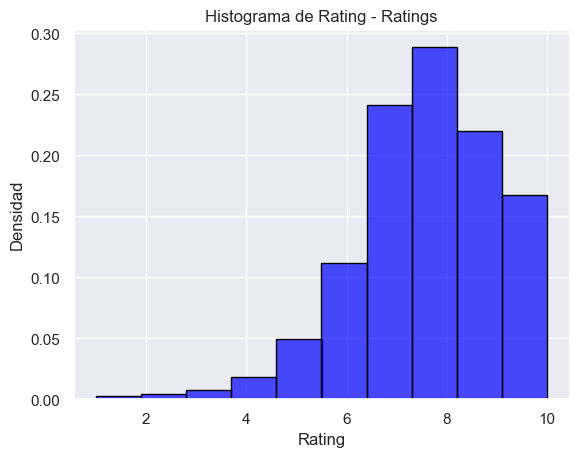

In [10]:
sns.histplot(data=ratings_obs, x="rating", bins=10, color='blue', edgecolor='black', alpha=0.7, stat="density")
# Personalizar el aspecto del histograma
sns.set(style="darkgrid")
plt.xlabel('Rating')
plt.ylabel('Densidad')
plt.title('Histograma de Rating - Ratings')

Text(0.5, 1.0, 'Histograma de Rating - Anime')

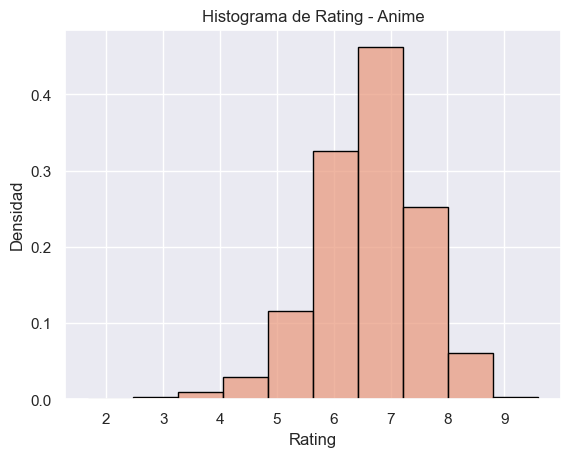

In [11]:
sns.set(style="darkgrid")
sns.histplot(data=data, x="rating", bins=10, color='#E9967A', edgecolor='black', alpha=0.7, stat="density")
# Personalizar el aspecto del histograma
plt.xlabel('Rating')
plt.ylabel('Densidad')
plt.title('Histograma de Rating - Anime')

Es claro que existe una tendencia hacia la izquierda por parte de los usuarios. En otras palabras, en los datos recopilados, los individuos tienden a calificar positivamente aquellos programas que son de su agrado.

Una vez concluido el análisis de la columna `rating`, procederemos a ejecutar el comando *unique()* de Python, para visualizar de manera más sencilla si existe algún dato mal escrito en la base de datos.

In [12]:
episodios_emitidos= data.episodes.unique()
print("Episodios emitidos:" f"{episodios_emitidos}")

Episodios emitidos:['64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26' '12'
 '27' '43' '74' '37' '2' '11' '1' '99' 'Unknown' '39' '101' '47' '50' '62'
 '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '103' '70' '153' '45' '5' '21' '63' '52'
 '28' '145' '36' '69' '60' '178' '114' '35' '61' '34' '109' '9' '49' '366'
 '97' '78' '358' '155' '20' '104' '113' '48' '54' '167' '161' '42' '142'
 '31' '373' '220' '46' '195' '17' '1787' '73' '147' '127' '16' '19' '98'
 '150' '76' '53' '124' '29' '115' '224' '44' '58' '93' '154' '92' '67'
 '172' '86' '30' '276' '59' '72' '330' '41' '105' '128' '137' '56' '55'
 '65' '243' '193' '18' '191' '180' '91' '192' '66' '182' '32' '164' '100'
 '296' '694' '95' '68' '117' '151' '130' '87' '170' '119' '84' '108' '156'
 '140' '331' '305' '300' '510' '200' '88' '1471' '526' '143' '726' '136'
 '1818' '237' '1428' '365' '163' '283' '71' '260' '199' '225' '312' '240'
 '1306' '1565' '773' '1274' 

De los resultados obtenidos se logra apreciar que existen elementos llamados `Unknown`, esto se debe a que existen animes en la lista que aún se encuentran en emisión, por lo que recodificaremos esta variable para luego graficar los resultados obtenidos.

In [13]:
data.episodes.unique()
data['episodes'].replace("Unknown", "emision", inplace=True)

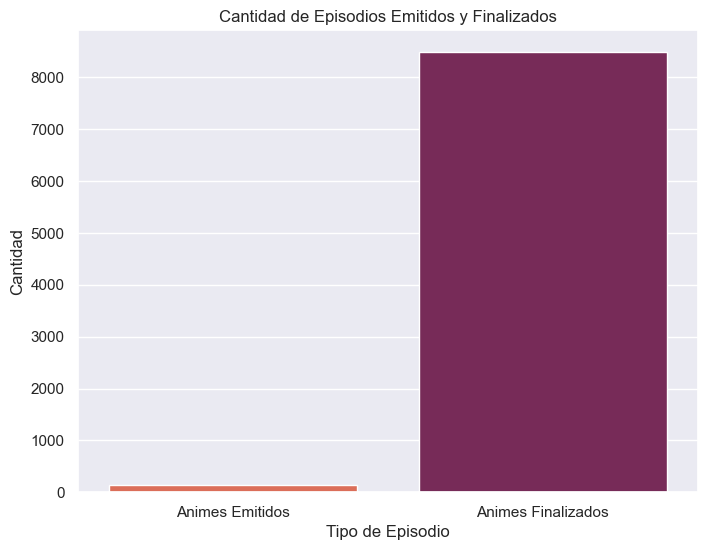

In [15]:
emision= []
finalizados= []
aux = data["episodes"].value_counts()
for i in data.episodes:
    if i != "emision":
        finalizados.append(i)
    else:
        emision.append(i)
data_counts = pd.DataFrame({'Tipo de Episodio': ['Animes Emitidos', 'Animes Finalizados'],
                            'Cantidad': [len(emision), len(finalizados)]})

plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.barplot(x='Tipo de Episodio', y='Cantidad', data=data_counts, palette='rocket_r')
plt.title('Cantidad de Episodios Emitidos y Finalizados')
plt.xlabel('Tipo de Episodio')
plt.ylabel('Cantidad')
plt.show()

Es claro notar que es muy probable que los usuarios esperen a calificar los animes una vez que estos se encuentren finalizados, y que los que se encuentran en emisión y poseen nota, puede deberse a que son una secuela o se relacionan directamente con el gusto específico de cada usuario.

Para terminar el análisis descriptivos de los datos, nos centramos en la columna `genre` de la dataset original y notamos que los géneros de cada anime se encontraban dentro de una misma columna separados por comas. Por lo tanto, aplicamos la función *melt()* de Python, lo cual nos permitió separar cada atributo en una columna distinta. 

In [17]:
# Realizamos la separación de la columna genre
df_melted = data.melt(id_vars=["anime_id", "name", "type", "episodes", "rating", "members"],
                    value_vars=["genero_1", "genero_2", "genero_3", "genero_4", "genero_5",
                                "genero_6", "genero_7", "genero_8", "genero_9", "genero_10",
                                "genero_11", "genero_12", "genero_13"],
                    value_name="genero")
df_melted = df_melted.dropna(subset=["genero"])
df_melted["genero"] = df_melted["genero"].str.lstrip()
df_melted

,anime_id,name,type,episodes,rating,members,variable,genero
0,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,genero_1,Action
1,28977,Gintama°,TV,51,9.25,114262,genero_1,Action
2,9253,Steins;Gate,TV,24,9.17,673572,genero_1,Sci-Fi
3,9969,Gintama&#039;,TV,51,9.16,151266,genero_1,Action
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,TV,10,9.15,93351,genero_1,Comedy
...,...,...,...,...,...,...,...,...
84036,29527,Kagee Mukashibanashi,TV,65,7.50,87,genero_10,Supernatural
88844,2832,Ani*Kuri15,Special,15,7.02,12926,genero_11,Slice of Life
90904,231,Asagiri no Miko,TV,26,6.31,4721,genero_11,Supernatural
97471,2832,Ani*Kuri15,Special,15,7.02,12926,genero_12,Super Power


Para identificar los géneros con una mayor tendencia, se calculó la media y la desviación estándar del rating para cada uno de ellos, y se representaron en un gráfico.

(6.0, 8.0)

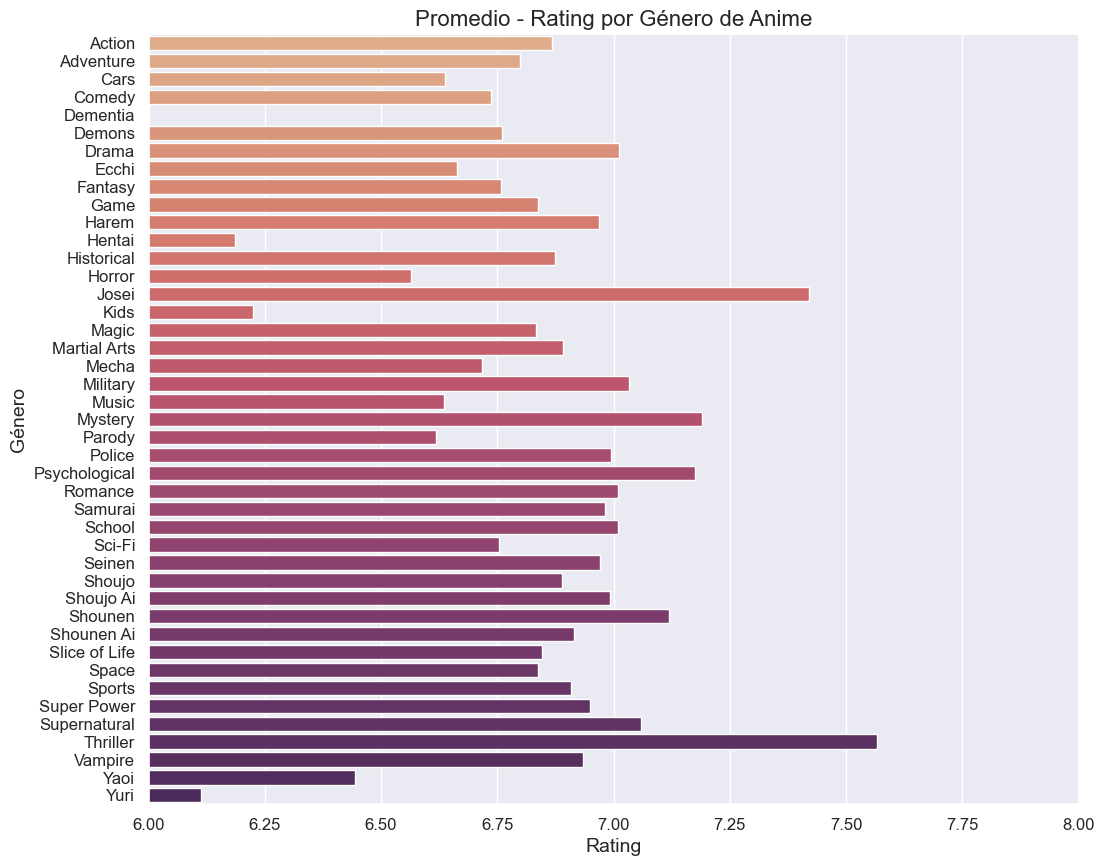

In [19]:
# Cálculo del promedio
resumen_promedio_ratings = df_melted.groupby("genero")["rating"].mean().reset_index()

# Gráfico
plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")
sns.barplot(x="rating", y="genero", data=resumen_promedio_ratings, palette="flare")
plt.title('Promedio - Rating por Género de Anime', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(6, 8)

Se puede apreciar que los géneros que poseen un mayor rating son "Thriller", "Josei", "Psychological", "Mystery" y "Military". A priori, y sin tener mayor conocimiento de cuáles son las especificaciones de un anime para obtener determinado género, es posible ver que son etiquetas que pueden ser relacionadas entre sí. La explicación detrás de estos resultados puede racionarse si recordamos que un anime puede tener más de una clasificación.

Otro resultado que se aprecia, es que el género "Dementia" es el que posee el menor ranking entre todos, con una puntuación menor de 5 puntos. 
Sin embargo, debido a que obtuvimos el promedio, se procedió a obtener la desviación estandar para luego visualizarla mediante otro gráfico.

(0.5, 1.2)

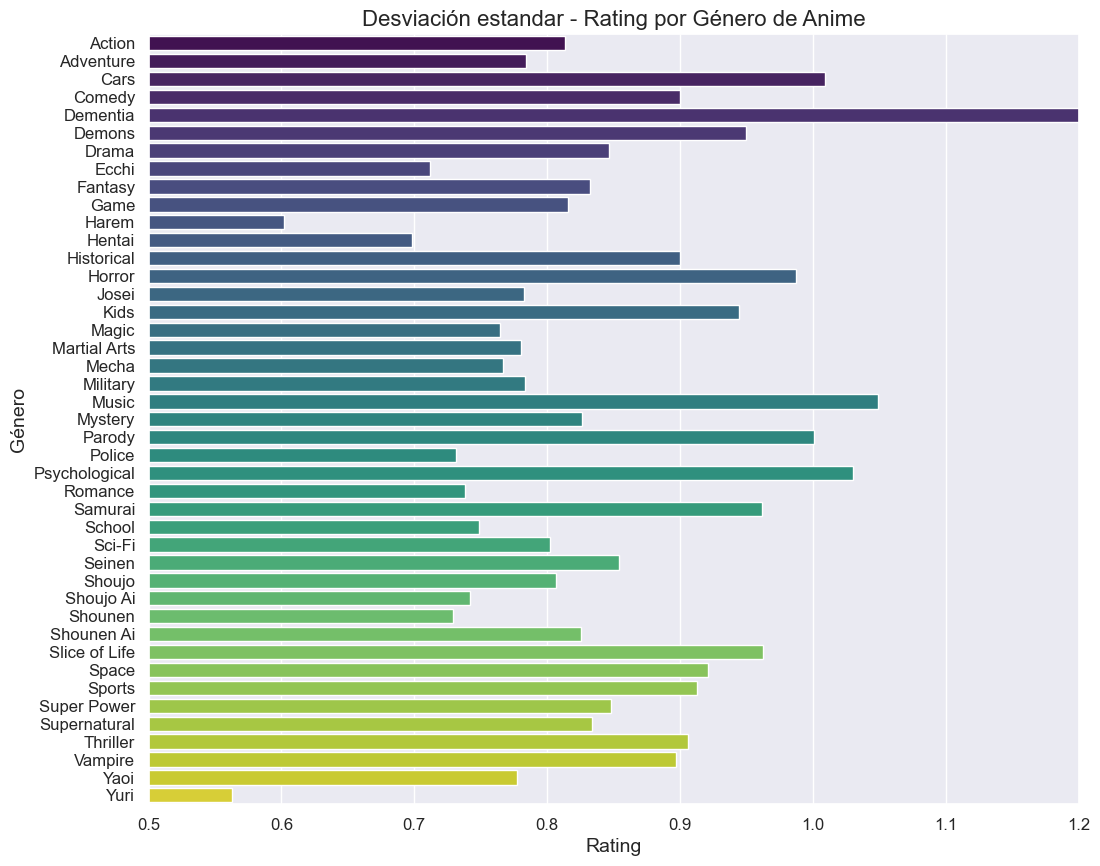

In [20]:
# Obtención de la desviación estándar
resumen_std_ratings = df_melted.groupby("genero")["rating"].std().reset_index()

plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")
sns.barplot(x="rating", y="genero", data=resumen_std_ratings, palette="viridis")

# Personalizar el gráfico
plt.title('Desviación estandar - Rating por Género de Anime', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0.5, 1.2)

Se puede apreciar que el género "Dementia" es quien posee la mayor desviación estándar, lo cual acusa que que las calificaciones entregadas para este anime fueron diversas, lo cual, si ligamos los resultados anteriormente obtenidos, podemos deducir que sus calificaciones pueden estar entre los 6 a 7 puntos, pero también debe tener calificaciones entre los 2-3 puntos. Por lo tanto, puede ser un programa que para ser recomendado, deben tener los usuarios gustos muy específicos.
El mismo análisis se puede extrapolar a los géneros "Music", "Cars", "Psychological" y "Demons".

#### (c) Descripción de los métodos utilizados

Los sistemas de recomendación que se presentarán se basan en la similitud de los ítemes, en este caso, los animes y los usuarios usando el rating que le dan a cada uno de ellos. Para ello, se usará la librería `surprise` basada en `sckit-learn`, en donde el centro será específicamente los métodos basados en contenido y la métrica a usar será `la distancia del coseno` y `la correlación de Pearson`. Ambos son métodos de interacción *usuario-item*, esto se debe principalmente a que no contamos con la información suficiente de los usuarios para usar otros que utilizan las características de los individuos. Sin embargo, sí es posible crear distintos sistemas de recomendación que son basados en contenido ya que, a pesar de pertenecer a la misma rama, la forma de calcular la similaridad entre usuarios es diferente, puesto que ambos algoritmos se basan en buscar las distancias más pequeñas entre los individuos.

Además, se agregará el método de `Popular Item` que se caracteriza en recomendar el elemento más popular que aún no ha visto el usuario. A pesar de no ser un algoritmo personalizado, este se utiliza bastante cuando ingresa un usuario nuevo a alguna plataforma, que en este caso sería al mundo del anime.

#### (d) Implementación computacional

Antes de comenzar con la creación de los sistemas de recomendacción basados en contenido como tal, es necesario seleccionar de la base `ratings`, aquellos animes que mencionamos en el análisis  exploratorio que ibamos a  usar:

In [21]:
# filtrar por tipo de animes
filtro1 = data["anime_id"]
ratings_priori = ratings_obs[ratings_obs['anime_id'].isin(filtro1)] 

Una vez que tenemos los ratings, se sigue teniendo muchas valoraciones (más de 5 millones) lo que, en otros contextos, es muy bueno. Sin embargo, por razones computacionales se seleccionará aquellos individuos que han valorado más de un anime, para este caso serán los usuarios que han valorado más de 400 animes. Esto tambien se hace para que la opinión del usuario sea creíble:

In [22]:
a = ratings_priori.groupby("user_id")["rating"].count().reset_index()
a.query('rating >= 400', inplace=True)

usu_v = a["user_id"]

ratings_final = ratings_obs[ratings_obs['user_id'].isin(usu_v)]
ratings_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1115306 entries, 302 to 7812702
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1115306 non-null  int64
 1   anime_id  1115306 non-null  int64
 2   rating    1115306 non-null  int64
dtypes: int64(3)
memory usage: 34.0 MB


Finalmente, ahora que se posee  una base procesable  para la memoria de los equipos se puede comenzar con la  creación del modelo:


i) Lo primero que se debe hacer para crear algoritmos de recomendación es dividir la base, `ratings_finales`, en los datos para entrenar el modelo y para probarlo o testearlo:

In [23]:
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader

train, test = train_test_split(ratings_final, test_size = 0.05, random_state=288)
reader = Reader(rating_scale=(1,10))
data_train= Dataset.load_from_df(df=train,reader=reader)

ii) Ahora que esta dividida la base, se procede a crear el modelo basado en contenido. El primer método a implementar será el que se obtiene con la similaridad calculando la distancia del coseno, este se obtiene a partir del ángulo de distancia entre dos vectores, esto se hará con la función `prediction_algorithms.knns` de la librería `surprise`:

In [24]:
# Método 1: KNN con cosine

import surprise.prediction_algorithms.knns as knns
sim_options = {"name": "cosine","user_based": True}

model_knn= knns.KNNWithZScore(sim_options=sim_options, verbose=False)
model_knn.fit(data_train.build_full_trainset())


iii) Ya construido el modelo se creará su matriz de similitud para poder hacer las comparaciones entre individuos y poder determinar aquellos animes que le podrían gustar al usuario.

In [25]:
users_sim = pd.DataFrame(
    data = model_knn.sim,
    index = usu_v,
    columns = usu_v
)
users_sim.head()

user_id,5,123,226,271,294,392,446,478,661,741,...,73276,73286,73340,73356,73362,73378,73395,73417,73499,73502
user_id,,,,,,,,,,,,,,,,,,,,,
5,1.000000,0.970570,0.975968,0.947449,0.981943,0.970156,0.975434,0.974507,0.980523,0.963750,...,0.970515,0.981894,0.958896,0.954251,0.979837,0.972034,0.980706,0.984203,0.981219,0.973075
123,0.970570,1.000000,0.965922,0.971434,0.983262,0.966004,0.975974,0.980138,0.978773,0.973504,...,0.978944,0.978591,0.938506,0.959896,0.975972,0.977643,0.967841,0.978607,0.978987,0.983478
226,0.975968,0.965922,1.000000,0.952851,0.986063,0.974332,0.975268,0.979298,0.982979,0.978674,...,0.971512,0.984791,0.957765,0.965585,0.982116,0.983586,0.984259,0.979096,0.982593,0.980034
271,0.947449,0.971434,0.952851,1.000000,0.973625,0.950422,0.967738,0.965746,0.966495,0.951826,...,0.962986,0.971384,0.909941,0.939807,0.964763,0.976226,0.956131,0.967766,0.973601,0.966537
294,0.981943,0.983262,0.986063,0.973625,1.000000,0.983590,0.986493,0.989757,0.990020,0.981389,...,0.990028,0.992202,0.950882,0.964502,0.991005,0.992565,0.987784,0.992077,0.995276,0.992849


Ahora replicando el procedimiento anterior pero esta vez calculando la matriz de similitud, a través del cálculo de la correlación de Pearson, como segundo  método:

In [26]:
# Método 2: KNN con pearson

sim_options2 = {"name": "pearson","user_based": True}

model_knn2= knns.KNNWithZScore(sim_options=sim_options2, verbose=False)
model_knn2.fit(data_train.build_full_trainset())

In [27]:
users_sim2 = pd.DataFrame(
    data = model_knn2.sim,
    index = usu_v,
    columns = usu_v
)
users_sim2.head()

user_id,5,123,226,271,294,392,446,478,661,741,...,73276,73286,73340,73356,73362,73378,73395,73417,73499,73502
user_id,,,,,,,,,,,,,,,,,,,,,
5,1.000000,0.158635,0.423980,-0.117648,0.325416,0.161292,0.175409,0.314994,0.193734,0.111981,...,0.107934,0.459333,0.191202,-0.015485,0.238652,0.107233,0.241342,0.399306,0.534950,0.262432
123,0.158635,1.000000,-0.020481,0.386497,0.322811,0.060033,0.151773,0.283386,0.165500,0.269745,...,0.182714,0.057489,0.038907,0.090618,0.140018,0.270520,-0.094065,0.144940,0.218561,0.151924
226,0.423980,-0.020481,1.000000,-0.169537,0.481997,0.289592,0.237786,0.301015,0.326940,0.280816,...,0.097069,0.380482,0.492013,0.155764,0.283665,0.406261,0.426667,-0.030634,0.456262,0.286846
271,-0.117648,0.386497,-0.169537,1.000000,0.226122,-0.009019,0.207517,0.186439,0.099055,-0.012468,...,0.121278,0.073435,-0.056426,0.111779,0.131823,0.424350,-0.068844,0.000455,0.138729,0.265359
294,0.325416,0.322811,0.481997,0.226122,1.000000,0.482927,0.442884,0.438513,0.305275,0.434522,...,0.465640,0.341142,0.544837,0.181296,0.405302,0.453980,0.266542,0.371111,0.652151,0.397906


De esta forma es posible crear dos sistemas de recomendación basados en contenido. Ahora bien, para el método del `Popular Item` utilizando el comando *sort()* se puede obtener una lista con los animes que son de mayor agrado para los usuarios:

In [28]:
data_ordenada = data.sort_values(by='rating', ascending=False)
animes_mas_populares = data_ordenada.head(10)
animes_mas_populares.query("members > 1000")

,anime_id,name,type,episodes,rating,members,genero_1,genero_2,genero_3,genero_4,genero_5,genero_6,genero_7,genero_8,genero_9,genero_10,genero_11,genero_12,genero_13
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,Action,Adventure,Drama,Fantasy,Magic,Military,Shounen,None,None,None,None,None,None
2,28977,Gintama°,TV,51,9.25,114262,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
3,9253,Steins;Gate,TV,24,9.17,673572,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
4,9969,Gintama&#039;,TV,51,9.16,151266,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,TV,10,9.15,93351,Comedy,Drama,School,Shounen,Sports,None,None,None,None,None,None,None,None
6,11061,Hunter x Hunter (2011),TV,148,9.13,425855,Action,Adventure,Shounen,Super Power,None,None,None,None,None,None,None,None,None
7,820,Ginga Eiyuu Densetsu,OVA,110,9.11,80679,Drama,Military,Sci-Fi,Space,None,None,None,None,None,None,None,None,None
9,15417,Gintama&#039;: Enchousen,TV,13,9.11,81109,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None


#### (e) Resultados obtenidos

Para probar los modelos se harán pruebas con algunos usuarios, en específico al `usuario 5` y al `usuario 226` para ver cuales son los individuos que más se le asemejan:

In [29]:
users_sim[5].sort_values(ascending=False).head()

user_id
5        1.000000
23595    0.987218
40696    0.986572
19011    0.986355
53333    0.986195
Name: 5, dtype: float64

Es claro observar que el usuario 23595 es el que más se parece al `usuario 5`, por lo que se intentará crear una lista de animes que le podrían agradar al `usuario 23595`:

In [30]:
# recomendarle animes al usuario 23595 según el que más se le parece, el usuario 5

animes_u5 = ratings_final.query('user_id ==5')['anime_id']
animes_u23595 = ratings_final.query('user_id == 23595')['anime_id']

recomendaciones_u23595 = []

for i in animes_u5:
    if i not in animes_u23595:
        recomendaciones_u23595.append(i)
        
data[data['anime_id'].isin(recomendaciones_u23595)][1:10]

,anime_id,name,type,episodes,rating,members,genero_1,genero_2,genero_3,genero_4,genero_5,genero_6,genero_7,genero_8,genero_9,genero_10,genero_11,genero_12,genero_13
4,9969,Gintama&#039;,TV,51,9.16,151266,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
9,15417,Gintama&#039;: Enchousen,TV,13,9.11,81109,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
12,918,Gintama,TV,201,9.04,336376,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
14,28891,Haikyuu!! Second Season,TV,25,8.93,179342,Comedy,Drama,School,Shounen,Sports,None,None,None,None,None,None,None,None
16,23273,Shigatsu wa Kimi no Uso,TV,22,8.92,416397,Drama,Music,Romance,School,Shounen,None,None,None,None,None,None,None,None
20,263,Hajime no Ippo,TV,75,8.83,157670,Comedy,Drama,Shounen,Sports,None,None,None,None,None,None,None,None,None
30,245,Great Teacher Onizuka,TV,43,8.77,268487,Comedy,Drama,School,Shounen,Slice of Life,None,None,None,None,None,None,None,None
32,5258,Hajime no Ippo: New Challenger,TV,26,8.75,88995,Comedy,Drama,Shounen,Sports,None,None,None,None,None,None,None,None,None
40,1535,Death Note,TV,37,8.71,1013917,Mystery,Police,Psychological,Supernatural,Thriller,None,None,None,None,None,None,None,None


Acá visualizamos los primeros 10 animes que podrían ser del agrado para el `usuario 23595`, basándonos en que se parece al `usuario 5`. Si repetimos este ejercicio para el `usuario 226`, se tiene:

In [31]:
users_sim[226].sort_values(ascending=False).head()

user_id
226      1.000000
17487    0.989508
31588    0.989194
22259    0.989178
14805    0.989109
Name: 226, dtype: float64

En este caso, el `usuario 17487` es el que más se parece al `usuario 226`, por lo que se intentará crear una lista de animes que le podrían agradar al `usuario 17487`:

In [32]:
# recomendarle animes al usuario 17487 según el que más se parece usuario 226:

animes_u226 = ratings_final.query('user_id == 226')['anime_id']
animes_u17487 = ratings_final.query('user_id == 17487')['anime_id']

recomendaciones_u17487 = []

for i in animes_u226:
    if i not in animes_u17487:
        recomendaciones_u17487.append(i)


data[data['anime_id'].isin(recomendaciones_u17487)][1:10]


,anime_id,name,type,episodes,rating,members,genero_1,genero_2,genero_3,genero_4,genero_5,genero_6,genero_7,genero_8,genero_9,genero_10,genero_11,genero_12,genero_13
3,9253,Steins;Gate,TV,24,9.17,673572,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
6,11061,Hunter x Hunter (2011),TV,148,9.13,425855,Action,Adventure,Shounen,Super Power,None,None,None,None,None,None,None,None,None
10,4181,Clannad: After Story,TV,24,9.06,456749,Drama,Fantasy,Romance,Slice of Life,Supernatural,None,None,None,None,None,None,None,None
12,918,Gintama,TV,201,9.04,336376,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
13,2904,Code Geass: Hangyaku no Lelouch R2,TV,25,8.98,572888,Action,Drama,Mecha,Military,Sci-Fi,Super Power,None,None,None,None,None,None,None
16,23273,Shigatsu wa Kimi no Uso,TV,22,8.92,416397,Drama,Music,Romance,School,Shounen,None,None,None,None,None,None,None,None
19,1575,Code Geass: Hangyaku no Lelouch,TV,25,8.83,715151,Action,Mecha,Military,School,Sci-Fi,Super Power,None,None,None,None,None,None,None
20,263,Hajime no Ippo,TV,75,8.83,157670,Comedy,Drama,Shounen,Sports,None,None,None,None,None,None,None,None,None
22,1,Cowboy Bebop,TV,26,8.82,486824,Action,Adventure,Comedy,Drama,Sci-Fi,Space,None,None,None,None,None,None,None


Nuevamente, usando la  matriz de  similaridad, se seleccionó al `usuario 23595` para comparar  las recomendaciones que hace el segundo método con respecto al primero y ver si los resultados obtenidos coinciden:

In [33]:
users_sim2[23595].sort_values(ascending=False).head()

user_id
23595    1.000000
53333    0.810022
58064    0.803487
67981    0.800145
53700    0.786350
Name: 23595, dtype: float64

En este caso, el `usuario 23595` se parece mucho más al `usuario 53333`, por lo que se verá que animes recomendar basándonos en este sujeto:

In [34]:
# recomendarle animes al usuario 23595 según el que más se le parece, el usuario 53333

animes_u53333 = ratings_final.query('user_id == 53333')['anime_id']
animes_u23595 = ratings_final.query('user_id == 23595')['anime_id']

recomendaciones_u23595 = []

for i in animes_u53333:
    if i not in animes_u23595:
        recomendaciones_u23595.append(i)
        
data[data['anime_id'].isin(recomendaciones_u23595)][1:10]

,anime_id,name,type,episodes,rating,members,genero_1,genero_2,genero_3,genero_4,genero_5,genero_6,genero_7,genero_8,genero_9,genero_10,genero_11,genero_12,genero_13
2,28977,Gintama°,TV,51,9.25,114262,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
3,9253,Steins;Gate,TV,24,9.17,673572,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
4,9969,Gintama&#039;,TV,51,9.16,151266,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
6,11061,Hunter x Hunter (2011),TV,148,9.13,425855,Action,Adventure,Shounen,Super Power,None,None,None,None,None,None,None,None,None
12,918,Gintama,TV,201,9.04,336376,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
13,2904,Code Geass: Hangyaku no Lelouch R2,TV,25,8.98,572888,Action,Drama,Mecha,Military,Sci-Fi,Super Power,None,None,None,None,None,None,None
19,1575,Code Geass: Hangyaku no Lelouch,TV,25,8.83,715151,Action,Mecha,Military,School,Sci-Fi,Super Power,None,None,None,None,None,None,None
21,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,OVA,4,8.83,129307,Action,Drama,Historical,Martial Arts,Romance,Samurai,None,None,None,None,None,None,None
22,1,Cowboy Bebop,TV,26,8.82,486824,Action,Adventure,Comedy,Drama,Sci-Fi,Space,None,None,None,None,None,None,None


Aquí es posible observar que de la lista obtenida, de los primeros 10, sólo coinciden 2. Sin embargo, si nos fijamos en los géneros que presenta cada anime estos son similares entre sí. Por lo tanto, la recomendación sí entrega resultados coherentes. 
Ahora, con el `usuario 17487` se realizará el mismo procedimiento y se comparará nuevamente con el método anterior:

In [35]:
users_sim2[17487].sort_values(ascending=False).head()

user_id
17487    1.000000
43886    0.772658
49711    0.769958
67117    0.743438
7311     0.717271
Name: 17487, dtype: float64

En este caso, el `usuario 17487` se parece mucho más al `usuario 43886`, por lo que se verá qué animes se recomiendan en base a este último:

In [38]:
# recomendarle animes al usuario 17487 según el que más se parece usuario 43886

animes_u43886 = ratings_final.query('user_id == 43886')['anime_id']
animes_u17487 = ratings_final.query('user_id == 17487')['anime_id']

recomendaciones_u17487 = []

for i in animes_u43886:
    if i not in animes_u17487:
        recomendaciones_u17487.append(i)


data[data['anime_id'].isin(recomendaciones_u17487)][1:10]


,anime_id,name,type,episodes,rating,members,genero_1,genero_2,genero_3,genero_4,genero_5,genero_6,genero_7,genero_8,genero_9,genero_10,genero_11,genero_12,genero_13
3,9253,Steins;Gate,TV,24,9.17,673572,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
10,4181,Clannad: After Story,TV,24,9.06,456749,Drama,Fantasy,Romance,Slice of Life,Supernatural,None,None,None,None,None,None,None,None
13,2904,Code Geass: Hangyaku no Lelouch R2,TV,25,8.98,572888,Action,Drama,Mecha,Military,Sci-Fi,Super Power,None,None,None,None,None,None,None
19,1575,Code Geass: Hangyaku no Lelouch,TV,25,8.83,715151,Action,Mecha,Military,School,Sci-Fi,Super Power,None,None,None,None,None,None,None
21,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,OVA,4,8.83,129307,Action,Drama,Historical,Martial Arts,Romance,Samurai,None,None,None,None,None,None,None
29,2001,Tengen Toppa Gurren Lagann,TV,27,8.78,562962,Action,Adventure,Comedy,Mecha,Sci-Fi,None,None,None,None,None,None,None,None
30,245,Great Teacher Onizuka,TV,43,8.77,268487,Comedy,Drama,School,Shounen,Slice of Life,None,None,None,None,None,None,None,None
36,11741,Fate/Zero 2nd Season,TV,12,8.73,340973,Action,Fantasy,Supernatural,Thriller,None,None,None,None,None,None,None,None,None
40,1535,Death Note,TV,37,8.71,1013917,Mystery,Police,Psychological,Supernatural,Thriller,None,None,None,None,None,None,None,None


En este caso, coinciden 4 de 10 animes, pero nuevamente los géneros de todos los programas mostrados son similares entre sí.

Los métodos, al utilizar distintas métricas, califican diferente a los itemes y a los usuarios pero, pesar de ello, existen ciertos elementos comunes. Además, varios de los animes que se encuentran en las listas de los usuarios que mostramos como ejemplo, también se encuentran dentro de los animes más populares por lo que, a pesar de ser usuarios con un gran conocimiento de programas japoneses, este último método también es factible para personas ya introducidas en el mundo del anime.

#### (f) Medida de performance

Para comprobar el funcionamiento del algoritmo, para ambos sistemas de recomendación se verá que tan bien los algoritmos generan la predición de los ratings versus sus valores reales. Para ello se creará la función `prediccion_rating` que generá una columna con todos los ratings que predice el modelo. Luego de obtener los resultados, se calculará el error cuadrático medio (RMSE) para así comparar cuál método es mejor:

In [39]:
def prediccion_rating(modelo, usuario, item):
  prediccion = modelo.predict(uid=usuario, iid=item)
  return prediccion.est

In [40]:
test["KNNPrediccion"] = test.apply(
    func = lambda row: prediccion_rating(model_knn, row["user_id"], row["anime_id"]),
    axis = 1
)
from sklearn.metrics import mean_squared_error
rmse_knn = mean_squared_error(test["rating"], test["KNNPrediccion"],squared=False)
print("RMSE modelo KNN: ",rmse_knn)

RMSE modelo KNN:  1.1485542834275795


In [42]:
test["KNNPrediccion"] = test.apply(
    func = lambda row: prediccion_rating(model_knn2, row["user_id"], row["anime_id"]),
    axis = 1
)

rmse_knn2 = mean_squared_error(test["rating"], test["KNNPrediccion"],squared=False)
print("RMSE modelo KNN: ",rmse_knn2)

RMSE modelo KNN:  1.1331235510127349


### Preguntas a Contestar:

#### (a) ¿Cuál es en su opinión el mejor sistema de recomendación? Discutir
Si sólo nos basamos en el error cuadrático medio para comparar los sistemas de recomendación, en nuestra opinión es mejor el modelo que utiliza el método de Pearson para calcular las similitudes entre los datos, ya que obtiene un valor de 1.13 mientras que el método de coseno obtiene un valor de 1.14. Sin embargo, podemos notar que la variación entre los errores no es elevada, esto puede explicarse a que ambos sistemas de recomendación están utilizando el filtro basado en contenido, ya que no poseíamos mayor información de los usuarios. 

#### (b) ¿Los métodos considerados son escalables? Comente
El método posee muchas posibilidades de ser escalable, ya que se pueden considerar otras variables para obtener la recomendación. Por ejemplo, en nuestro caso, como la cantidad de miembros que añadieron el anime a las listas de reproducción y/o el número de episodios. Sin embargo, debido al gran costo computacional que lleva generar la matriz de similitud y luego calcular los valores predichos, se dificulta la tarea de obtener una recomendación. Esto ocurre, ya que a nuestros equipos se les hace imposible procesar el tamaño de información resultante, la cual puede llegar a ser más de 2 millones de datos.

## Bibliografía

[1] Arellano-Valle, R. B., Contreras-Reyes, J. E., & Genton, M. G. (2012). Shannon Entropy and mutual information for multivariate Skew-Elliptical distributions. *Scandinavian Journal of Statistics*, 40(1), 42-62. https://doi.org/10.1111/j.1467-9469.2011.00774.x